###  TP2 Groupe 2 : Clustering et visualisation des donnees
### Membres du groupe

#### Membre 1 : Mohamed BOUBACAR BOUREIMA
CIP : BOUM3688

#### Membre 2 : Abdou Rahime DAOUDA 
CIP : DAOA2504

#### Membre 3 : Abdoul Madjid SANOUSSI LABO
CIP : SANA2909

#### Chargés du Cours:  Shengrui Wang/Etienne Gael Tajeuna

### Importation des packages


In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Ignorer les avertissements
warnings.filterwarnings('ignore')

#Garder constant l'alleatoire
random.seed(2000)

In [3]:
#Lecture des données
data = pd.read_csv("dataTp2.csv")

### Exploration et statistiques descriptives de données 

In [114]:
data.head()

Unnamed: 0  valence_intensity  fear_intensity  anger_intensity  \
0        2157           0.501000        0.405000         0.407000   
1        1223           0.497667        0.427000         0.408667   
2        1083           0.460600        0.439800         0.421000   
3         456           0.498000        0.454000         0.386000   
4        1448           0.458818        0.483091         0.406909   

   happiness_intensity  sadness_intensity  sentiment  
0             0.320000           0.365000          0  
1             0.290000           0.378333          0  
2             0.308400           0.406600          0  
3             0.379000           0.402000          0  
4             0.297818           0.395273          0

In [115]:
data.describe()

Unnamed: 0  valence_intensity  fear_intensity  anger_intensity  \
count  30000.000000       30000.000000    30000.000000     30000.000000   
mean    1494.839500           0.477280        0.435327         0.423444   
std      934.787122           0.082379        0.082018         0.075165   
min        0.000000           0.091000        0.113000         0.142000   
25%      711.000000           0.432000        0.381937         0.374800   
50%     1418.000000           0.486000        0.433500         0.414000   
75%     2200.000000           0.527000        0.484000         0.463000   
max     4291.000000           0.860000        0.850000         0.860000   

       happiness_intensity  sadness_intensity    sentiment  
count         30000.000000       30000.000000  30000.00000  
mean              0.311358           0.399372      0.00000  
std               0.081321           0.068110      0.81651  
min               0.008000           0.145000     -1.00000  
25%               0.265000           0.356383     -1.00000  
50%               0.314000           0.392000      0.00000  
75%               0.359000           0.433571      1.00000  
max               0.771000           0.833000      1.00000

#### Fonction d'affichage des nombres, taux, types des valeurs manquantes et aussi le nombre des valeurs uniques par attribut.


In [6]:
def desc_data(name, my_dataset):
    nbuniques = my_dataset.nunique()
    nb_m = my_dataset.isnull().sum().sort_values()
    ratio_m = (my_dataset.isnull().sum()/my_dataset.shape[0]).sort_values()
    manquant = pd.concat([nb_m, ratio_m], axis=1, sort=False)
    df = pd.DataFrame({'Types': my_dataset[list(manquant.index.values)].dtypes,
                       'Nb_Uniques': nbuniques,
                       'Nb manquants': nb_m,
                       'Ratio manquants%': ratio_m,})
    print("Jeu de données : ",name)
    return df,ratio_m.sum(),nb_m.sum()

In [7]:
info=desc_data("Data", data)
info[0].head(10)

Jeu de données :  Data


Types  Nb_Uniques  Nb manquants  Ratio manquants%
Unnamed: 0             int64        3785             0               0.0
valence_intensity    float64        4429             0               0.0
fear_intensity       float64        4400             0               0.0
anger_intensity      float64        4266             0               0.0
happiness_intensity  float64        4139             0               0.0
sadness_intensity    float64        3932             0               0.0
sentiment              int64           3             0               0.0

In [8]:
print( 'Total ratio = ', info[1])
print( 'Total valeurs manquantes = ', info[2])


Total ratio =  0.0
Total valeurs manquantes =  0


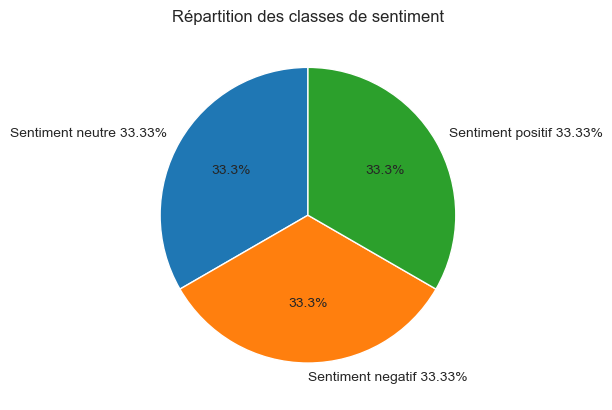

In [9]:
classes={-1:'negatif',0:'neutre',1:'positif'}
labels_class = ['Sentiment '+classes[classe] + ' ' + str(round((data["sentiment"] == classe).sum()*100/len(data), 2)) + "%" for classe in list(data['sentiment'].unique())]
sizes = [data["sentiment"].eq(classe).sum() for classe in list(data['sentiment'].unique())]

plt.pie(sizes, labels=labels_class, autopct='%1.1f%%', startangle=90)
plt.title("Répartition des classes de sentiment")
plt.show()

In [10]:
df = data.drop('Unnamed: 0', axis=1)

df.head()

valence_intensity  fear_intensity  anger_intensity  happiness_intensity  \
0           0.501000        0.405000         0.407000             0.320000   
1           0.497667        0.427000         0.408667             0.290000   
2           0.460600        0.439800         0.421000             0.308400   
3           0.498000        0.454000         0.386000             0.379000   
4           0.458818        0.483091         0.406909             0.297818   

   sadness_intensity  sentiment  
0           0.365000          0  
1           0.378333          0  
2           0.406600          0  
3           0.402000          0  
4           0.395273          0

### Question 1 : Visualisation conjointe des variables, vis à vis des sentiment

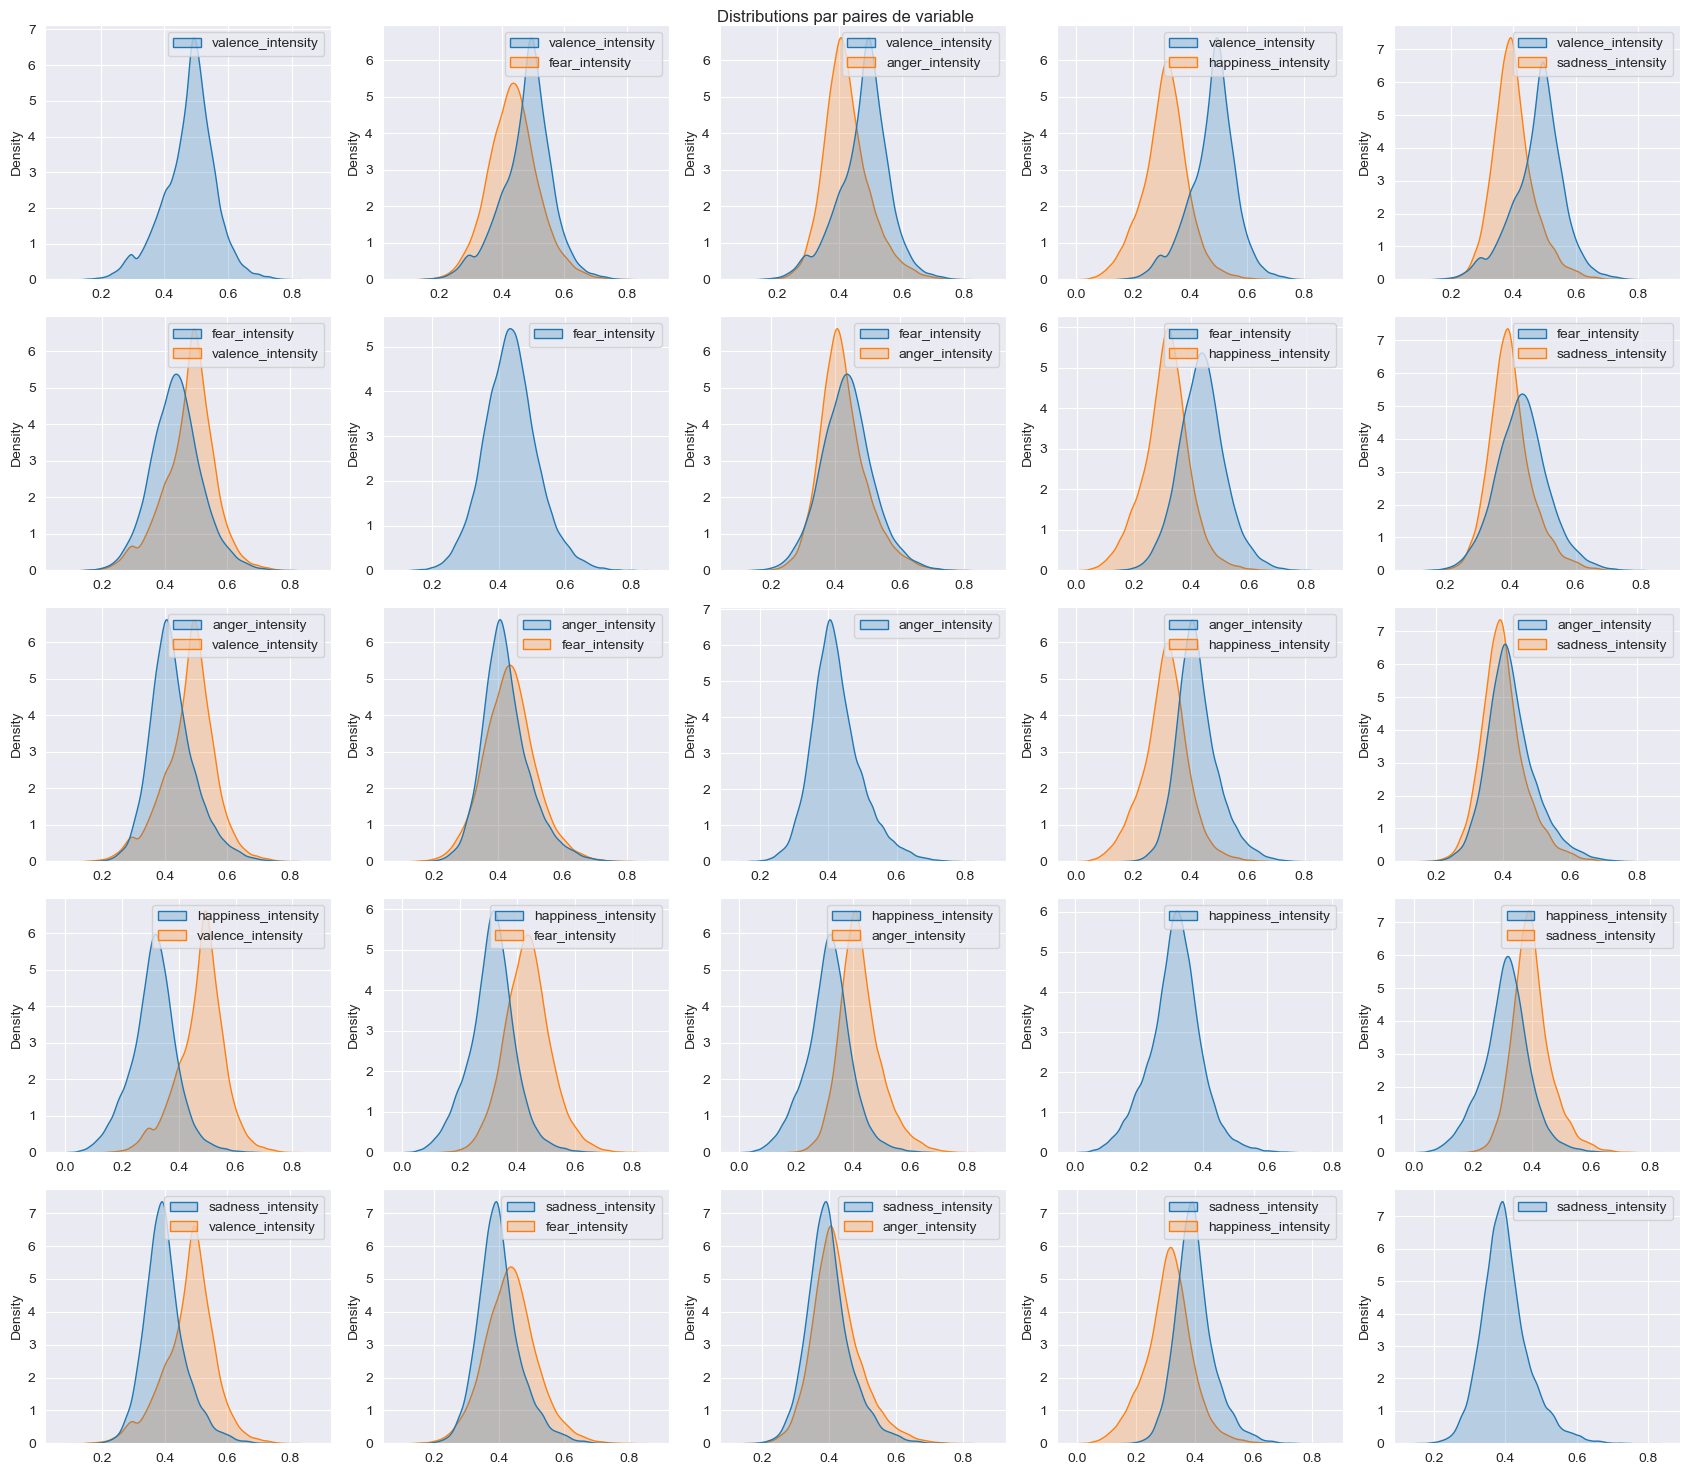

In [11]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(17, 15))
plt.suptitle("Distributions par paires de variables")
i=0
for col1 in df.columns[0:5]:
    j=0
    for col2 in df.columns[0:5]:
        sns.kdeplot(df[[col1,col2]], fill=True, common_norm=False,ax=axes[i,j])
        j+=1
    i+=1
# Ajustez l'espacement entre les graphiques
plt.tight_layout()

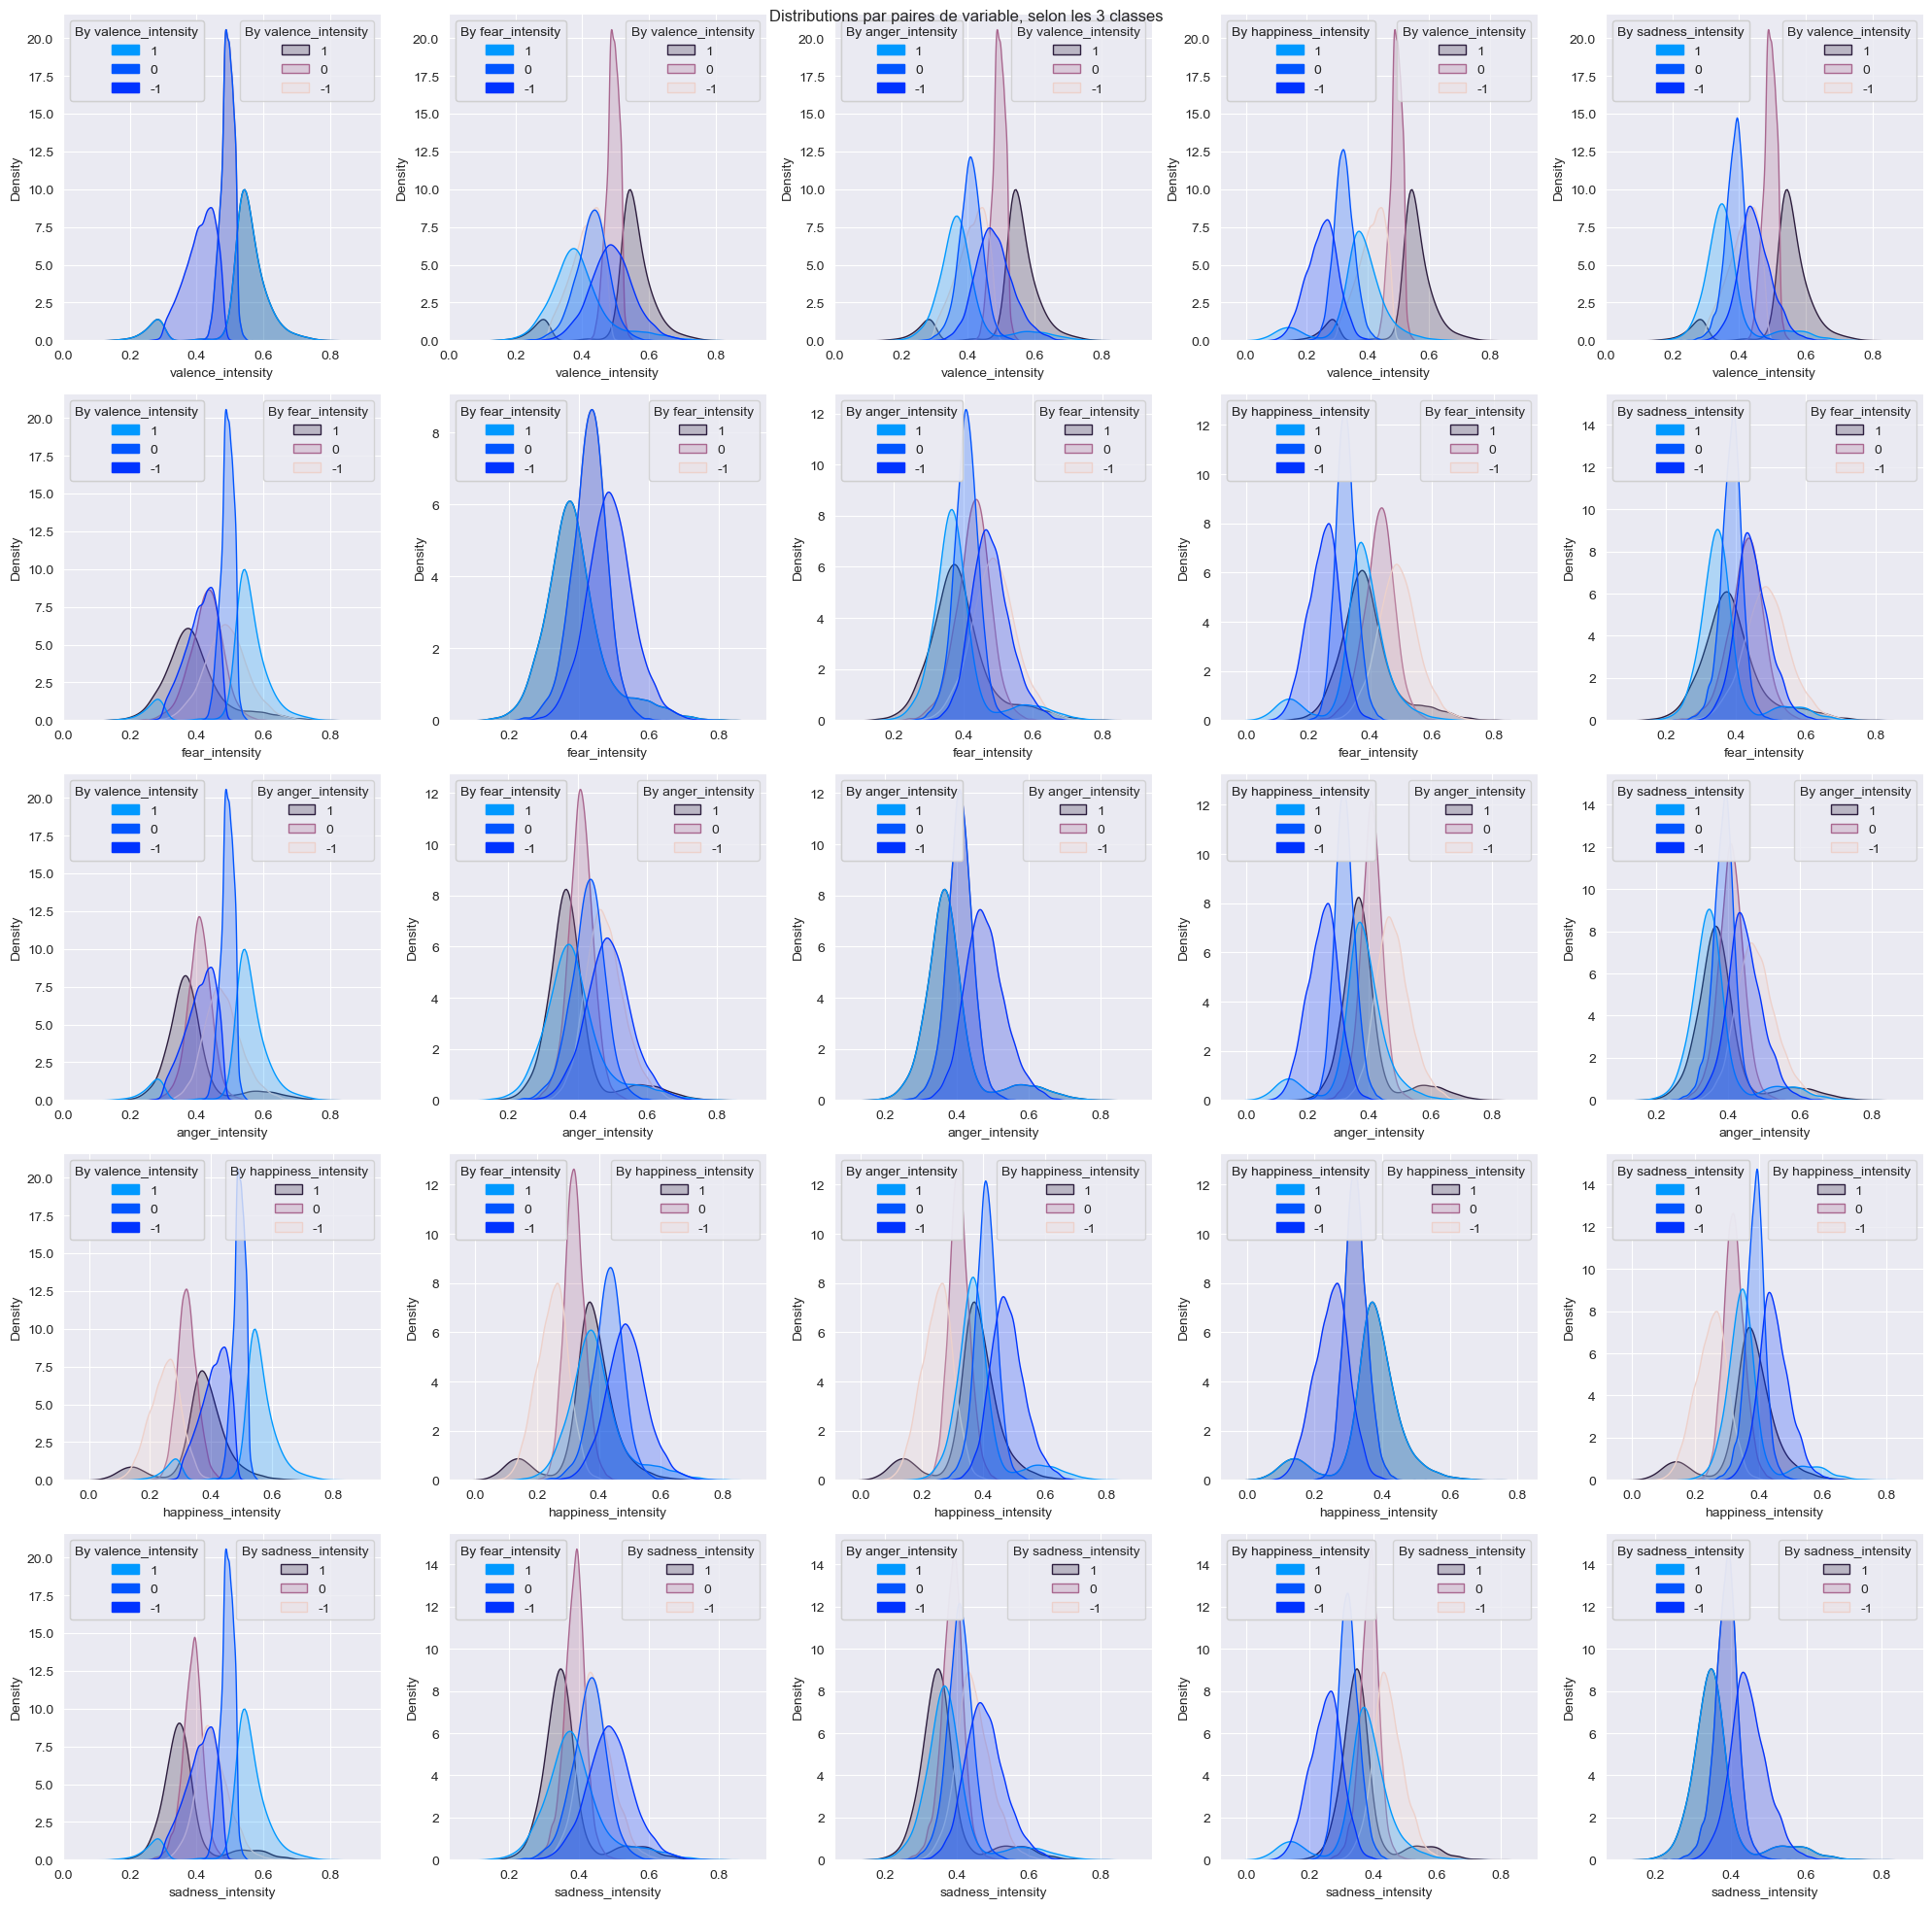

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
plt.suptitle("Distributions par paires de variable, selon les 3 classes")
i=0
palette = {-1: '#0033FF', 0: '#0055FF',1: '#0099FF'}
for col1 in df.columns[0:5]:
    j=0
    for col2 in df.columns[0:5]:
        sns.kdeplot(x=df[col1], hue=df['sentiment'], fill=True,common_norm=False,ax=axes[i,j])
        sns.kdeplot(x=df[col2], hue=df['sentiment'],  fill=True,palette=palette,common_norm=False,ax=axes[i,j])
        legend1 = axes[i,j].legend(title='By '+col1, labels=[1,0,-1], loc='upper right')
        legend2 = axes[i,j].legend(title='By '+col2, labels=[1,0,-1], loc='upper left')
        legend2.legendHandles[0].set_color('#0099FF')
        legend2.legendHandles[1].set_color('#0055FF')
        legend2.legendHandles[2].set_color('#0033FF')
        axes[i, j].add_artist(legend1)
        axes[i, j].add_artist(legend2)
        j+=1
    i+=1
# Ajustez l'espacement entre les graphiques
plt.tight_layout()

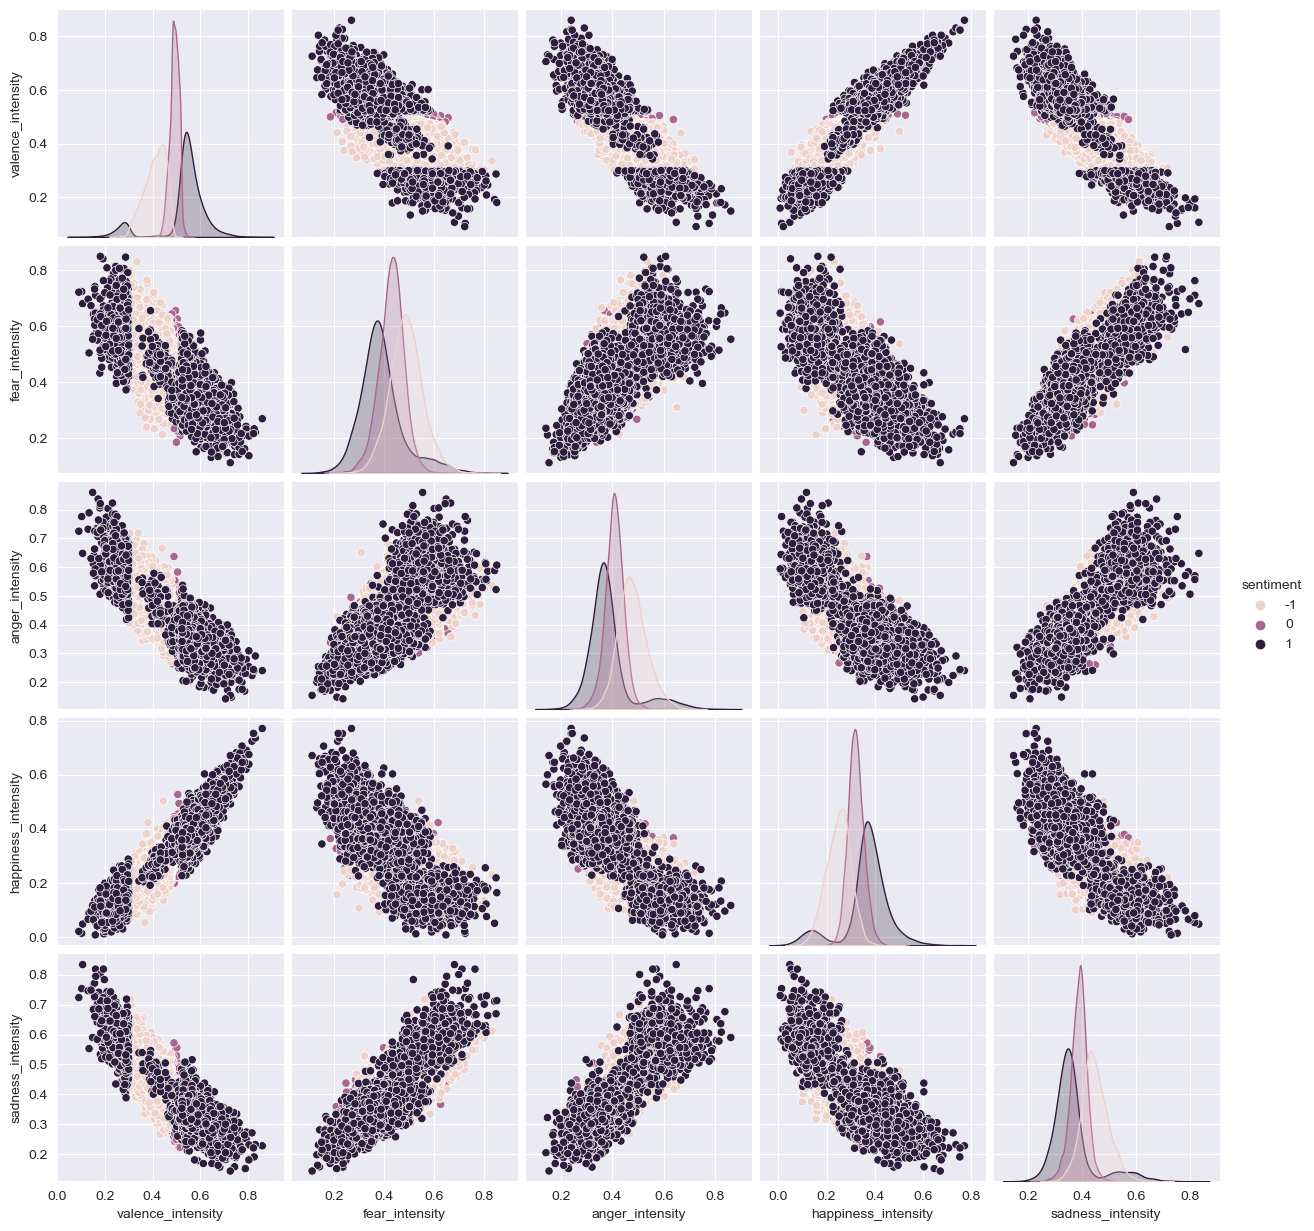

In [13]:
sns.pairplot(df,hue='sentiment')

### Question 2 : Utilisation du K-Means pour la separation des classes de sentiments et projection UMAP

Pour chacune des valeurs de K = {2, 3, 4, 5, 6, 7, 8, 9, 10} nous verons une projection UMAP des classes generee par K-Means

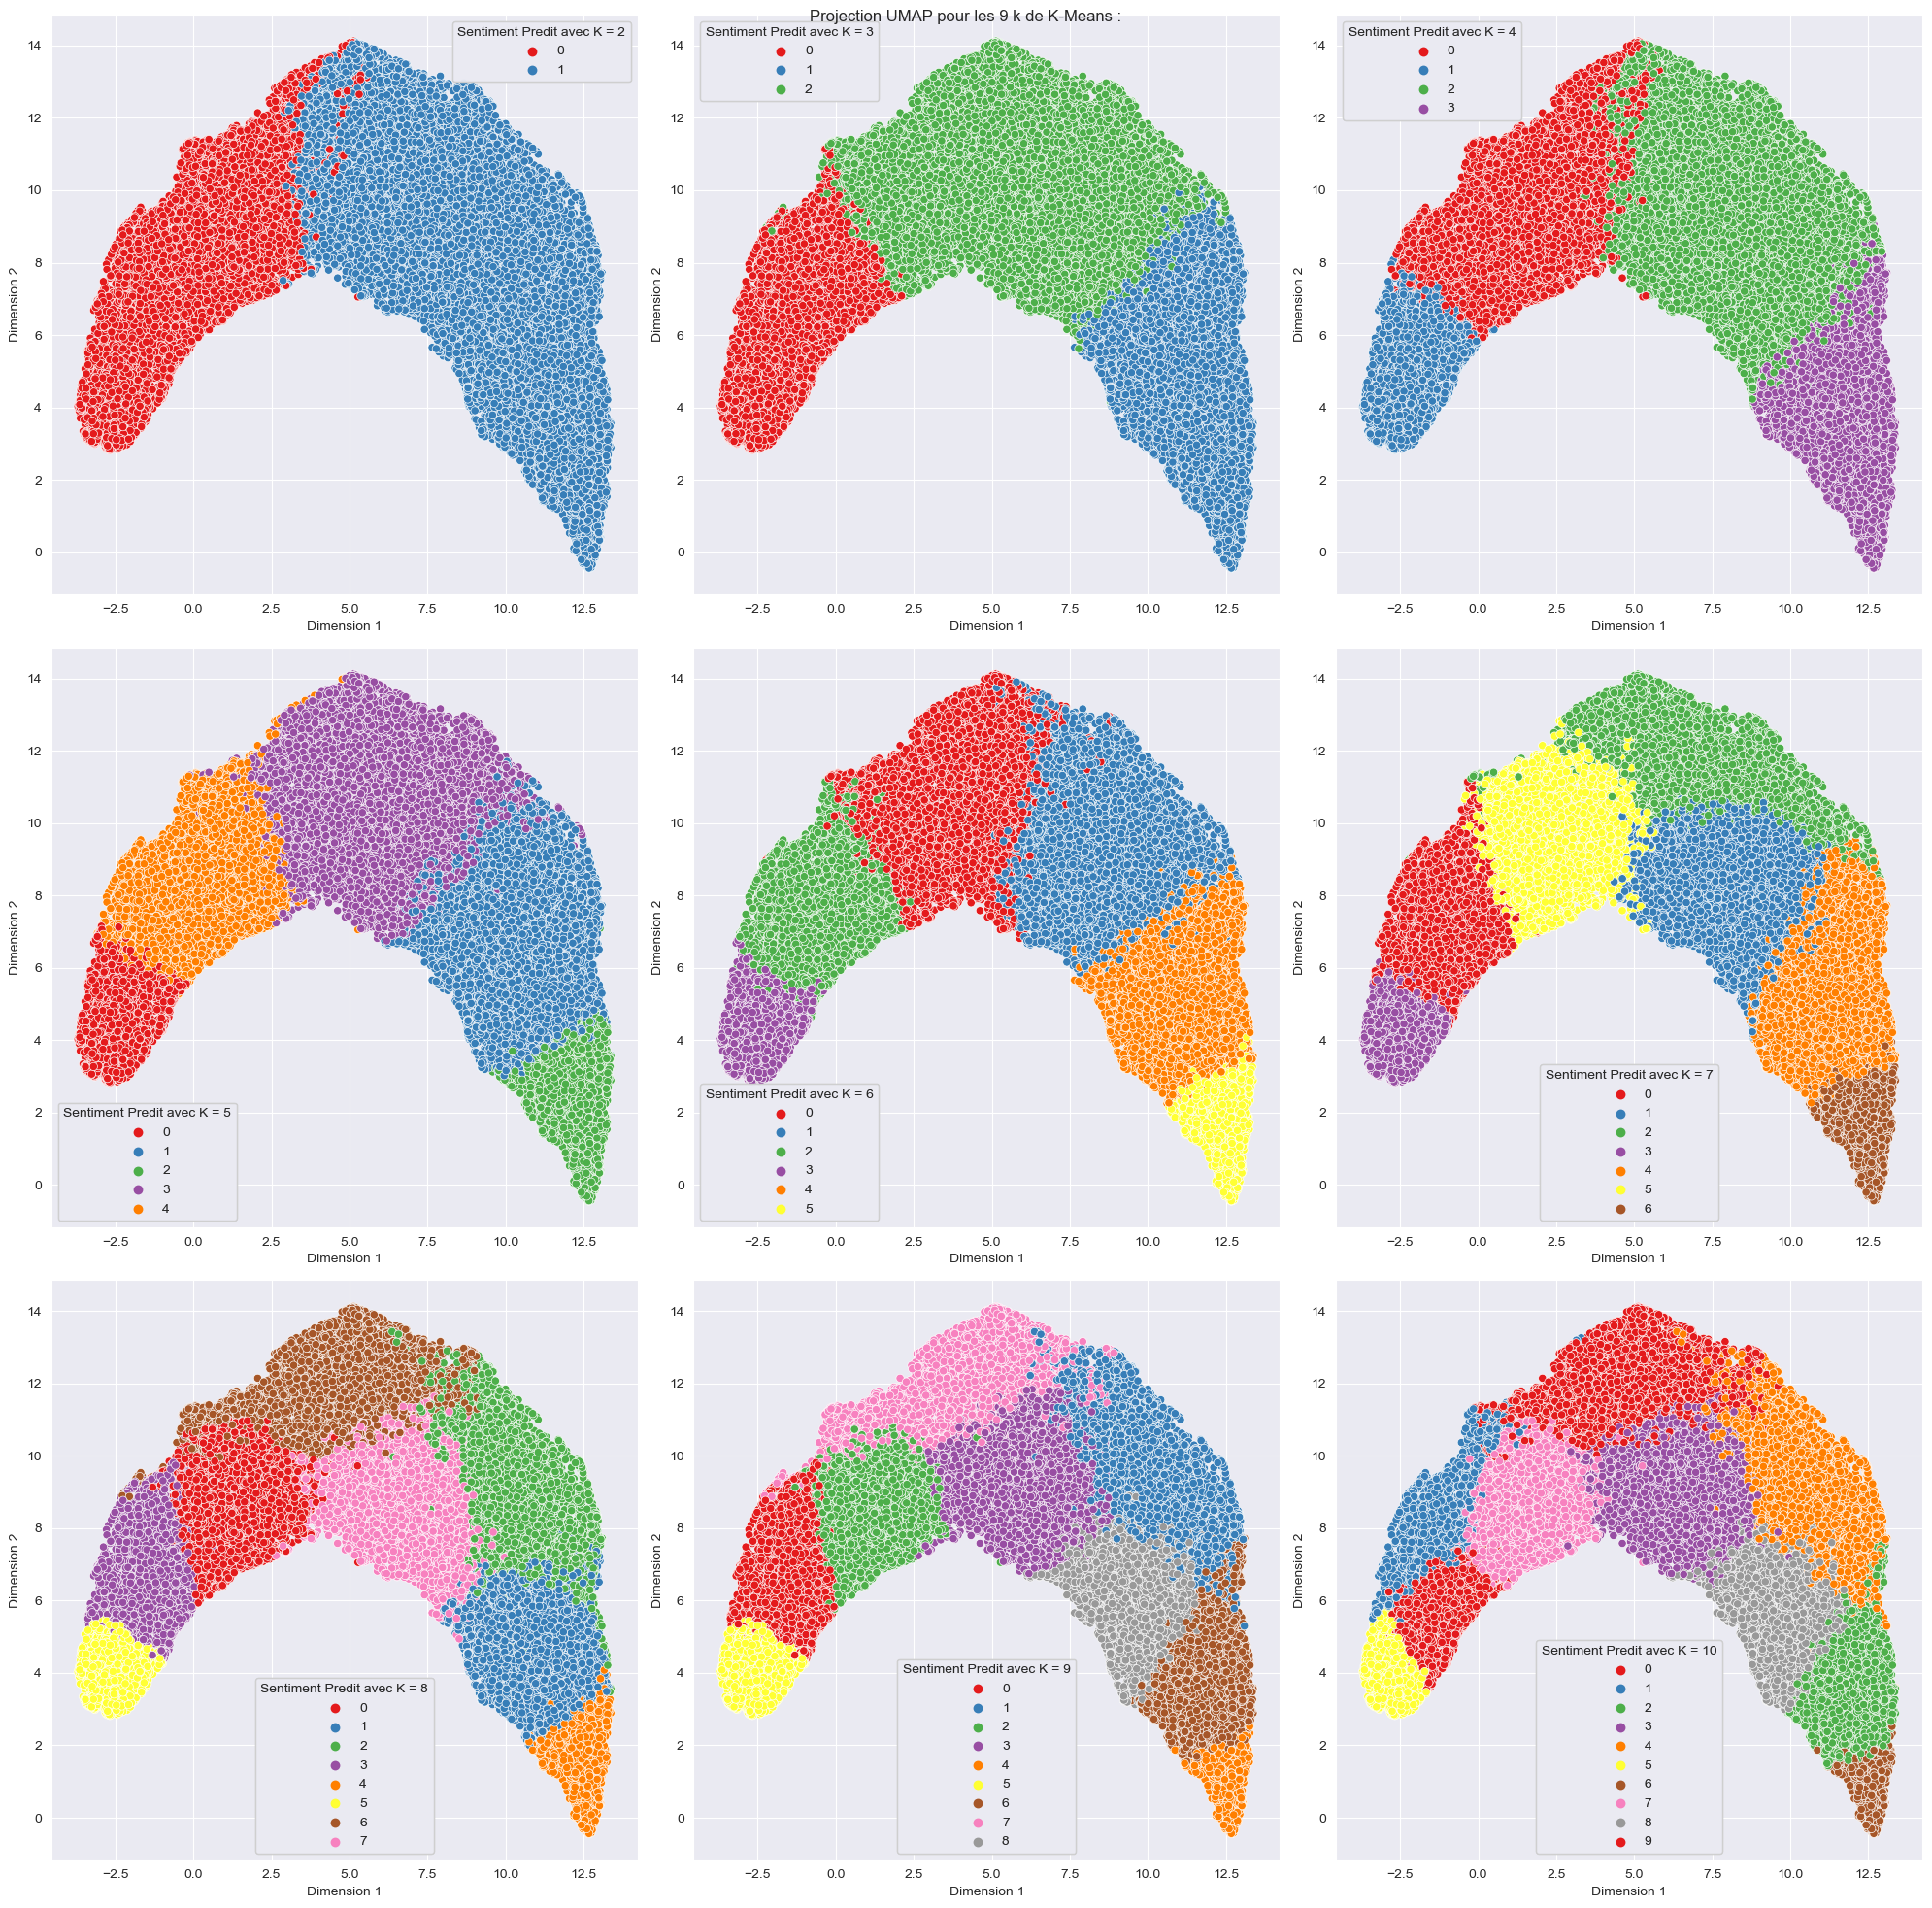

In [14]:
from umap import UMAP
from sklearn.cluster import KMeans

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
plt.suptitle("Projection UMAP pour les 9 k de K-Means :")
k=[2, 3, 4, 5, 6, 7, 8, 9, 10]
k_matrix = np.array(k).reshape(3, 3)

# Réaliser une UMAP (Uniform Manifold Approximation and Projection)

X = df.drop('sentiment', axis=1)
umap = UMAP(n_components=2)
X_umap = umap.fit_transform(X)

for i in range(3):
    for j in range(3):
        # Appliquer l'algorithme de k-means pour regrouper les données
        kmeans = KMeans(n_clusters=k_matrix[i,j])
        kmeans.fit(X)
        
        y_predict = kmeans.predict(X)
        # Créer un DataFrame pandas avec les résultats
        umap_df = pd.DataFrame(data={'Dimension 1': X_umap[:, 0], 'Dimension 2': X_umap[:, 1], 'Sentiment_pred': y_predict})
        sns.scatterplot(data=umap_df, x='Dimension 1', y='Dimension 2', hue='Sentiment_pred', palette='Set1',ax=axes[i,j])
        legend1 = axes[i,j].legend(title='Sentiment Predit avec K = '+str(k_matrix[i,j]))
        axes[i, j].add_artist(legend1)
        #plt.title('k='+str(k_matrix[i,j]))

plt.tight_layout()
plt.show()

### Bonnus : Projection des donnees intiales (Sans prediction), avec ACP, TSNE et UMAP

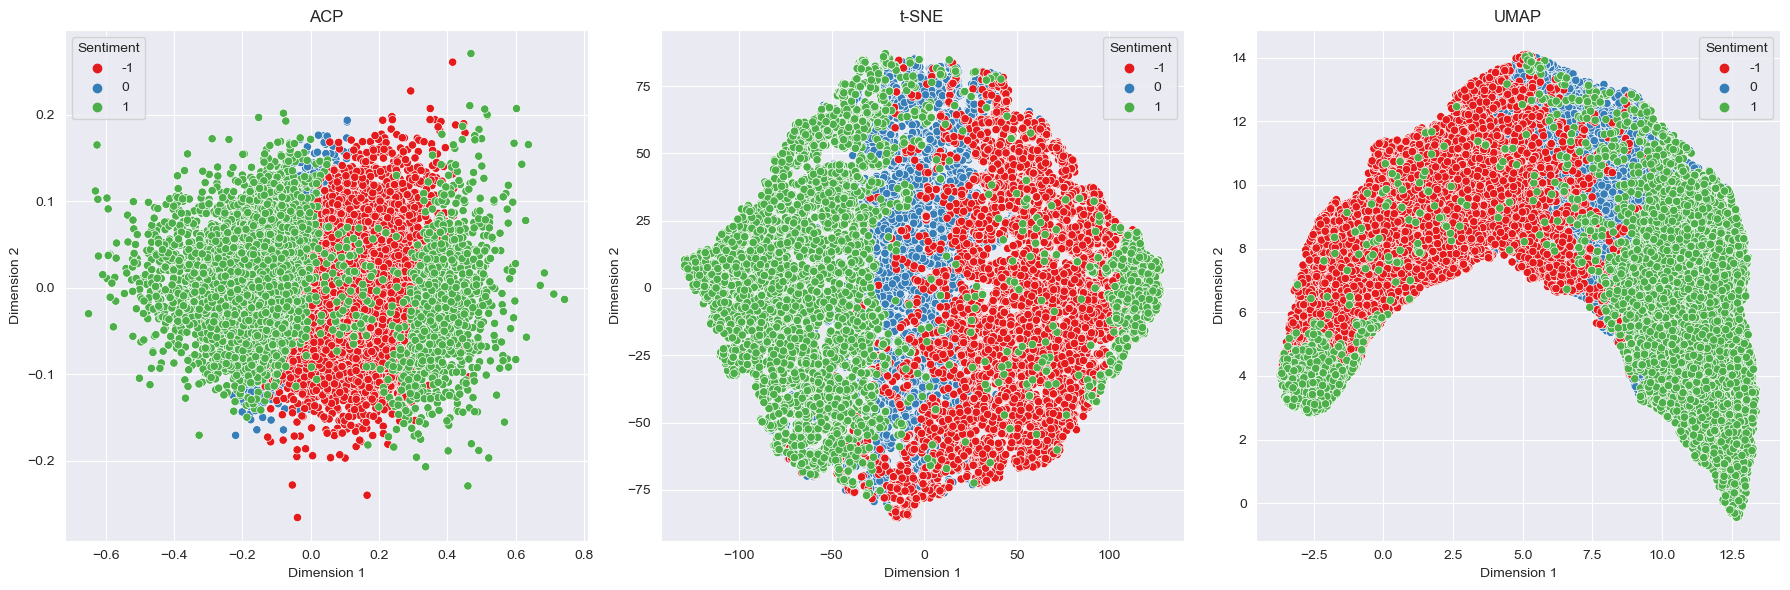

In [15]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

y = df['sentiment']

# Réaliser une ACP (Analyse en Composantes Principales)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Réaliser une t-SNE (t-Distributed Stochastic Neighbor Embedding)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Réaliser une UMAP (Uniform Manifold Approximation and Projection)
#umap = UMAP(n_components=2)
#X_umap = umap.fit_transform(X)
#Car deja fait dans la section precedente (dans le souci de garder la meme forme)
# Créer un DataFrame pandas avec les résultats
pca_df = pd.DataFrame(data={'Dimension 1': X_pca[:, 0], 'Dimension 2': X_pca[:, 1], 'Sentiment': y})
tsne_df = pd.DataFrame(data={'Dimension 1': X_tsne[:, 0], 'Dimension 2': X_tsne[:, 1], 'Sentiment': y})
umap_df = pd.DataFrame(data={'Dimension 1': X_umap[:, 0], 'Dimension 2': X_umap[:, 1], 'Sentiment': y})

# Tracer les résultats avec séparation des classes
plt.figure(figsize=(18, 6))
plt.subplot(131)
sns.scatterplot(data=pca_df, x='Dimension 1', y='Dimension 2', hue='Sentiment', palette='Set1')
plt.title('ACP')

plt.subplot(132)
sns.scatterplot(data=tsne_df, x='Dimension 1', y='Dimension 2', hue='Sentiment', palette='Set1')
plt.title('t-SNE')

plt.subplot(133)
sns.scatterplot(data=umap_df, x='Dimension 1', y='Dimension 2', hue='Sentiment', palette='Set1')
plt.title('UMAP')

plt.tight_layout()
plt.show()

### Question 3: 

Nous souhaiterons ici évaluer la repartition des clusters, en utilisant les deux critères : Overlap et score de silhouete. Pour l'overlap, nous décidons d'utiliser la distance de mahalanobis, etant donnée la forme non spherique des données sous une projection UMAP. 

### Overlap avec la distance de Mahalnobis pour les donnee de base

Text(0.5, 1.0, 'Séparation des classes avec dist. Mahalanobis')

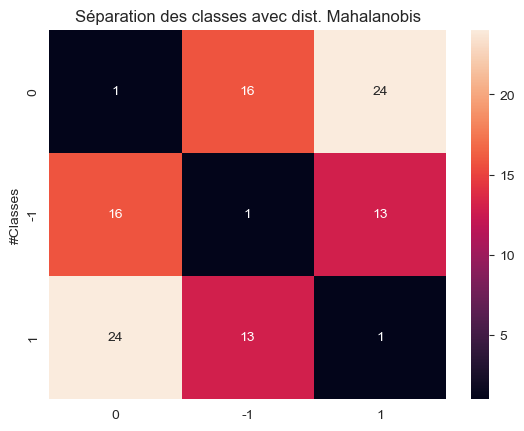

In [74]:
def mahalanobis_distances(sigma,centre, point):
    # Calculez la différence entre le point de référence et la moyenne
    diff = point - centre
    # Calculez la distance de Mahalanobis
    mahalanobis_distance = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(sigma)), diff.T))

    return mahalanobis_distance

def Calcul_distance_intra(data_classe):
    data_classe=data_classe.drop('sentiment', axis=1)
    centre = np.mean(data_classe, axis=0)
    try:
        # Calculez la matrice de covariance des données
        sigma= np.cov(data_classe, rowvar=False)
        List=[mahalanobis_distances(sigma,centre,np.array(data_classe.iloc[i])) for i in range(len(data_classe))]
    except:
        print('Indefinie, a cause de la singularite.1')
        List=[0]
    return round(max(List),3)

def Calcul_distance_inter(data_c1,data_c2):
    data_c1=data_c1.drop("sentiment",axis=1)
    data_c2=data_c2.drop("sentiment",axis=1)
    try:
        List_c1=[mahalanobis_distances(np.cov(data_c1, rowvar=False),np.mean(data_c2, axis=0), np.array(data_c1.iloc[i])) for i in range(len(data_c1))]
        List_c2=[mahalanobis_distances(np.cov(data_c2, rowvar=False),np.mean(data_c1, axis=0), np.array(data_c2.iloc[i])) for i in range(len(data_c2))]
    except:
        print('Indefinie, a cause de la singularite.2')
        List_c1=List_c2=[0]
    return round(min(min(List_c1), min(List_c2)), 3)

def overlap(c1, c2, df_dist):
    return round ((df_dist[c1][c1]+df_dist[c2][c2])/(2 * df_dist[c1][c2]), 3)

Uniques_Classe = list(df["sentiment"].unique())
Data_by_classe_Mahala=[]
for classe in Uniques_Classe:
    condition = df["sentiment"] == classe
    Data_by_classe_Mahala.append(df[condition])
    
dict_values_mahala={}
classes=[]
for data_classe_1 in Data_by_classe_Mahala:
    classes.append(data_classe_1["sentiment"].unique()[0])
    L=[]
    for data_classe_2 in Data_by_classe_Mahala:
        if data_classe_1["sentiment"].unique()[0]==data_classe_2["sentiment"].unique()[0]:
            L.append(Calcul_distance_intra(data_classe_1))
        else:
            L.append(Calcul_distance_inter(data_classe_1,data_classe_2))
    dict_values_mahala.update({data_classe_1["sentiment"].unique()[0]:L})
dict_values_mahala.update({'#Classes':classes})
df_dist_mahala = pd.DataFrame(dict_values_mahala)
df_dist_mahala= df_dist_mahala.set_index('#Classes')

dict_val_mahala={}
for classe_1 in list(df_dist_mahala.index):
    L=[]
    for classe_2 in list(df_dist_mahala.index):
        L.append(overlap(classe_1, classe_2, df_dist_mahala))
    dict_val_mahala.update({classe_1:L})
dict_val_mahala.update({'#Classes':list(df_dist_mahala.index)})
df_overlap_mahala = pd.DataFrame(dict_val_mahala)
df_overlap_mahala=df_overlap_mahala.set_index('#Classes')
sns.heatmap(df_overlap_mahala, annot=True)
plt.title('Séparation des classes avec dist. Mahalanobis')

### Overlap avec la distance Euclidienne pour tout les k :

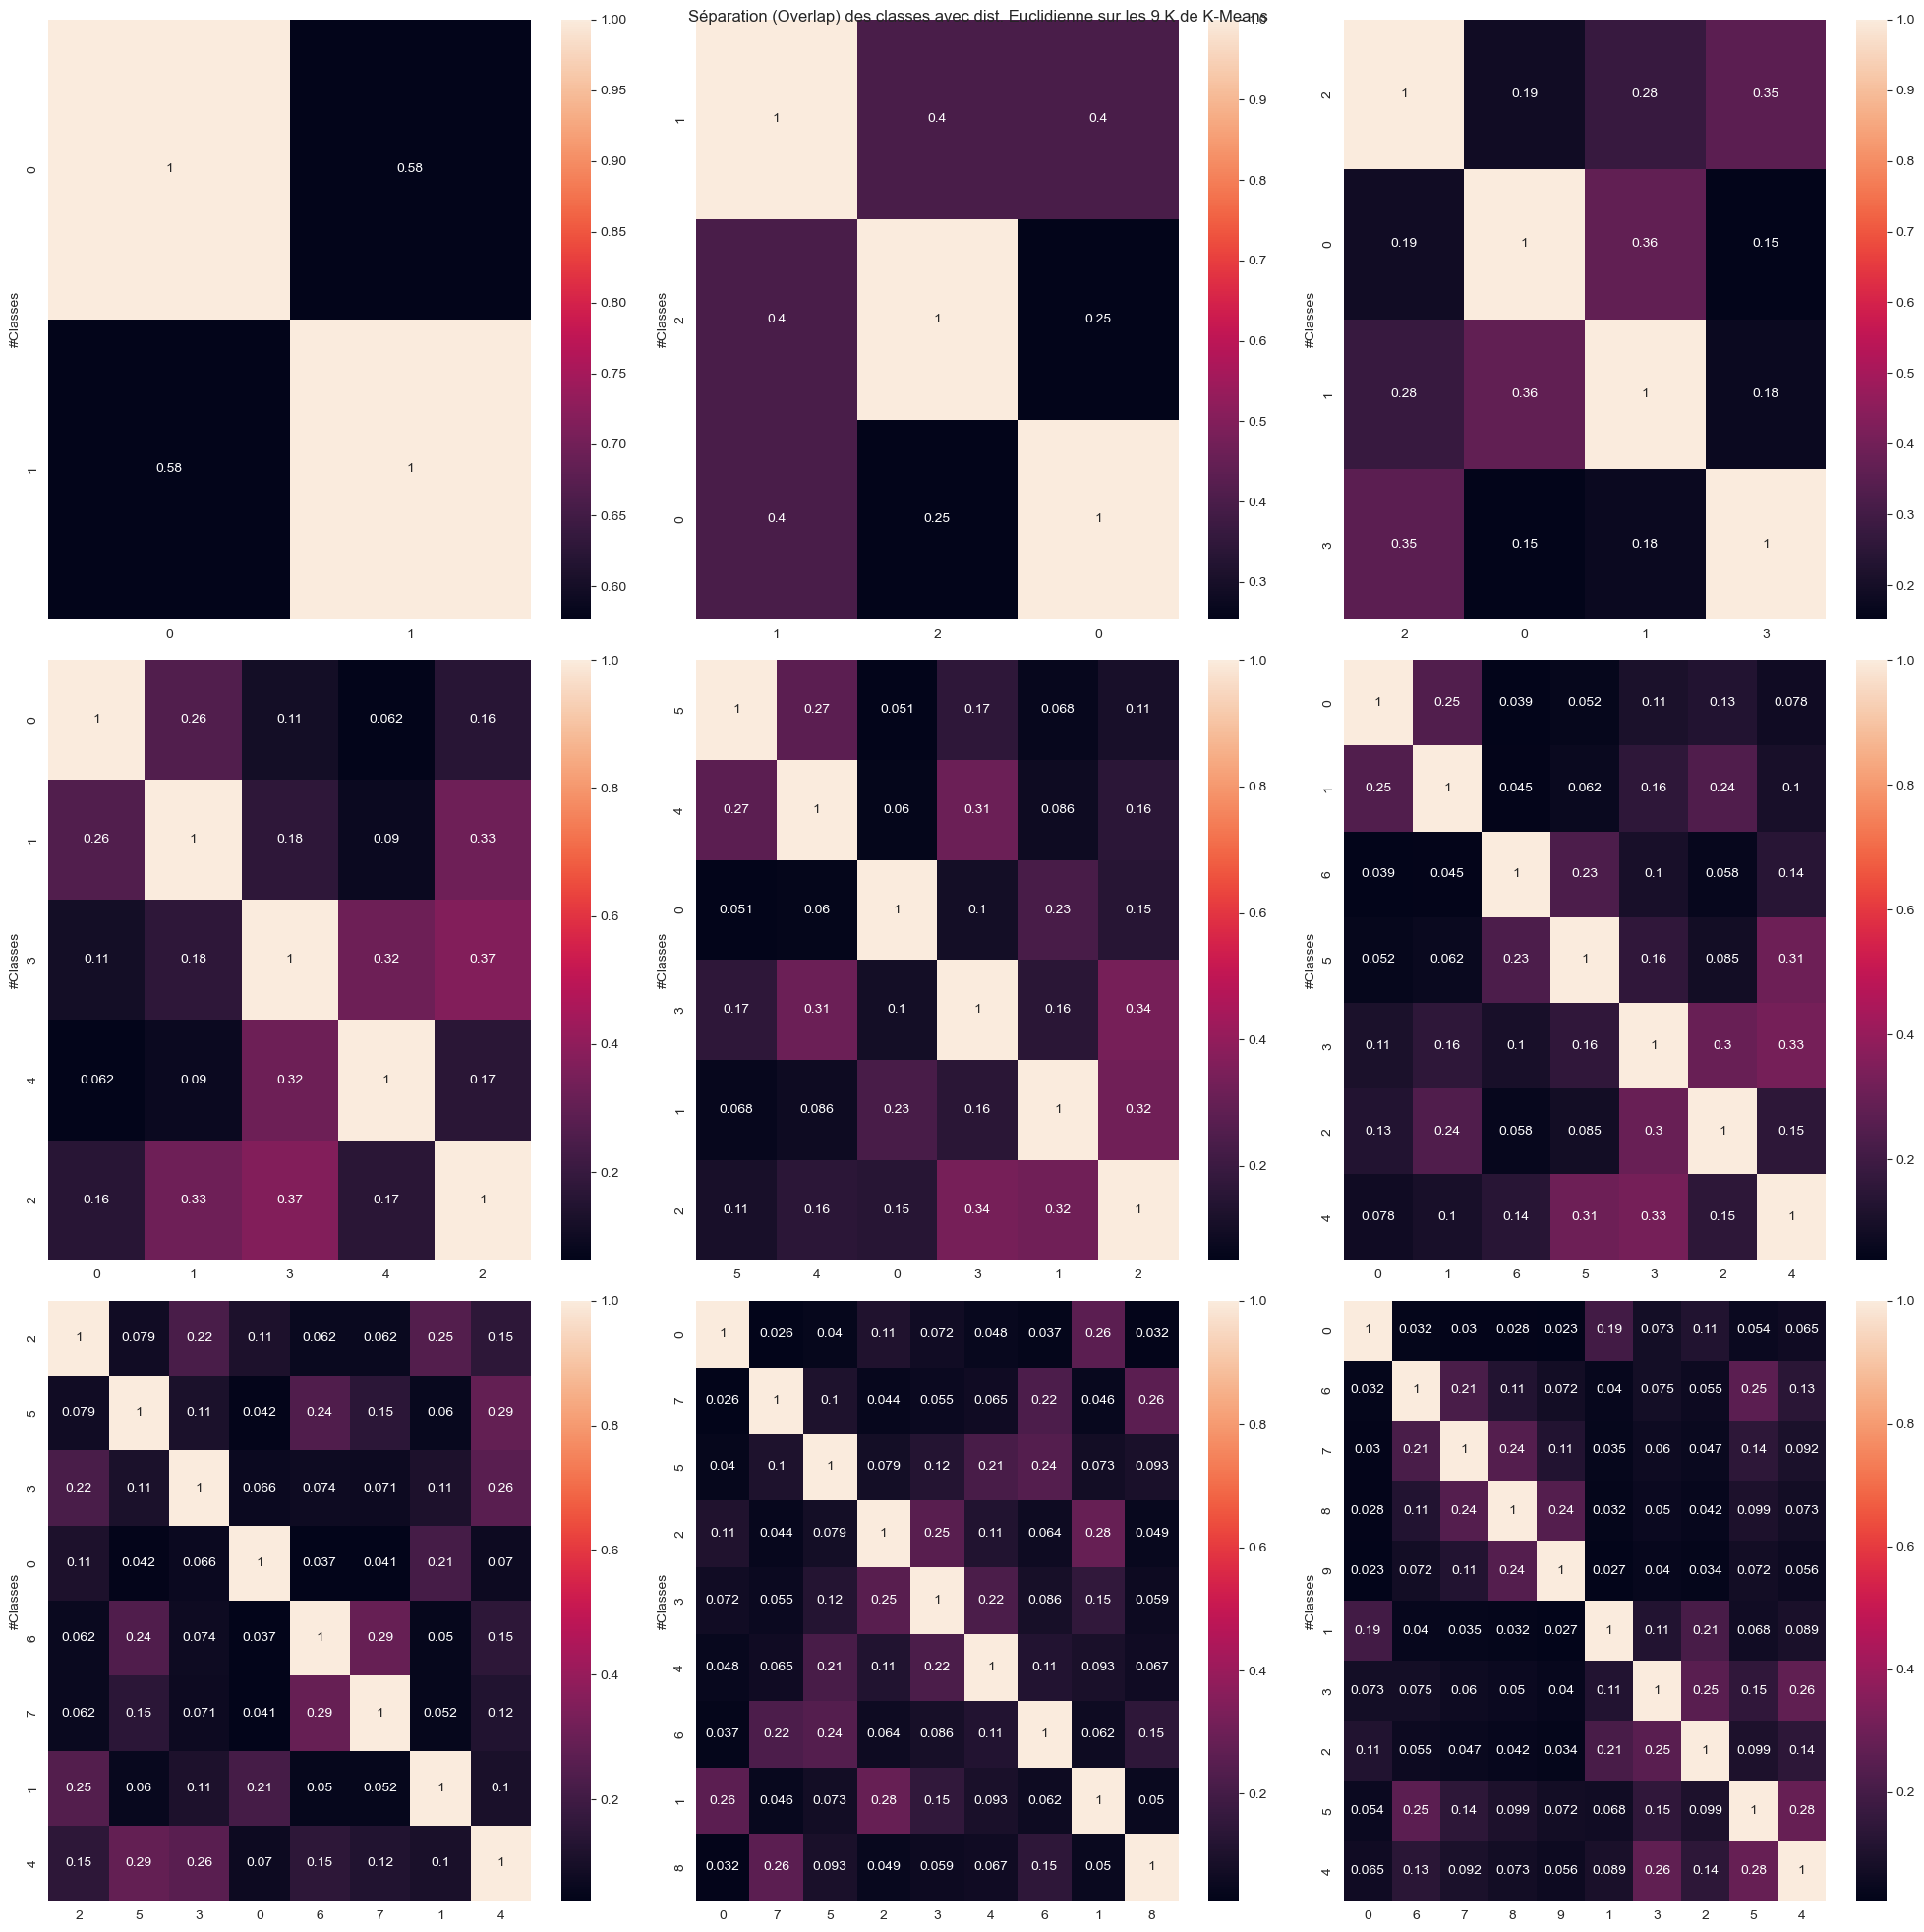

In [110]:
def dist_intra(class_set, metric):
    center = np.mean(class_set, axis=0)  # Calcul du centre (moyenne des patients)
    distances = [metric(patient, center) for patient in class_set]
    return max(distances)

def dist_inter(class_set1, class_set2, metric):
    center1 = np.mean(class_set1, axis=0)  # Centre de la classe 1
    center2 = np.mean(class_set2, axis=0)  # Centre de la classe 2
    dist1 = min([metric(patient, center2) for patient in class_set1])
    dist2 = min([metric(patient, center1) for patient in class_set2])
    return min(dist1, dist2)

def overlap(class_set1, class_set2, metric):
    if np.array_equal(class_set1,class_set2):
        #Nous decidons de remplacer la distance inter par la distance intra dans le cas ou cas les deux classes
        return 1
    else:
        intra1 = dist_intra(class_set1, metric)
        intra2 = dist_intra(class_set2, metric)
        inter = dist_inter(class_set1, class_set2, metric)
    return (intra1 + intra2) / (2 * inter)

euclidean_distance = lambda x, y: np.linalg.norm(x - y)


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
k=[2, 3, 4, 5, 6, 7, 8, 9, 10]
k_matrix = np.array(k).reshape(3, 3)

for i in range(3):
    for j in range(3):
        # Appliquer l'algorithme de k-means pour regrouper les données
        kmeans = KMeans(n_clusters=k_matrix[i,j])
        kmeans.fit(X)

        y_predict = kmeans.predict(X)

        df_pred=df.drop('sentiment',axis=1)
        df_pred["sentiment_pred"]=y_predict
        Data_by_classe_euclid=[]
        Uniques_Classe=list(df_pred["sentiment_pred"].unique())
        for classe in Uniques_Classe:
            condition = df_pred["sentiment_pred"] == classe
            Data_by_classe_euclid.append(df_pred[condition])
        dict_val_euclid={}
        for dfc1 in Data_by_classe_euclid:
            L=[]
            for dfc2 in Data_by_classe_euclid:
                overlap_value = overlap(np.array(dfc1), np.array(dfc2), euclidean_distance)
                L.append(overlap_value)
            dict_val_euclid.update({dfc1['sentiment_pred'].unique()[0]:L})
        dict_val_euclid.update({'#Classes':list(df_pred['sentiment_pred'].unique())})
        df_overlap_euclid = pd.DataFrame(dict_val_euclid)
        df_overlap_euclid=df_overlap_euclid.set_index('#Classes')
        sns.heatmap(df_overlap_euclid, annot=True,ax=axes[i,j])

plt.suptitle('Séparation (Overlap) des classes avec dist. Euclidienne sur les 9 K de K-Means')

plt.tight_layout()
plt.show()

### Score de Silhouette

In [51]:
from sklearn.metrics import silhouette_score

dict_val_silh={}
L=[]
for k_ in k:
    # Appliquer l'algorithme de k-means pour regrouper les données
    kmeans = KMeans(n_clusters=k_)
    kmeans.fit(X)
    y_predict = kmeans.labels_
    silhouette = silhouette_score(X,y_predict)
    L.append(silhouette)
    
dict_val_silh.update({'Silouhette':L})

dict_val_silh.update({'K':k})
df_silh = pd.DataFrame(dict_val_silh)
df_silh=df_silh.set_index('K')

print('Score silhouette pour les 9 k de K-means')
df_silh.head(10)

Silouhette
K             
2     0.430931
3     0.342401
4     0.298852
5     0.261152
6     0.216464
7     0.204341
8     0.199825
9     0.194793
10    0.194921

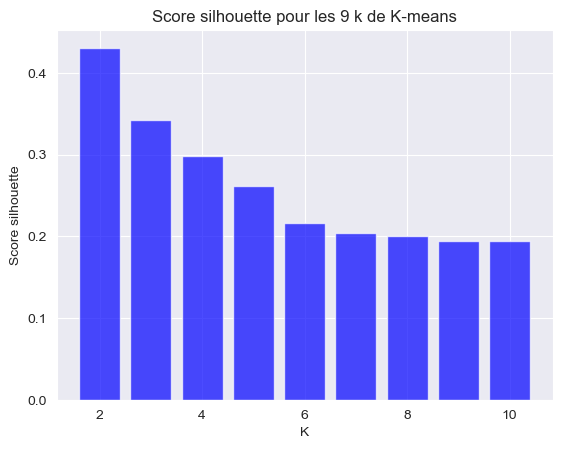

In [113]:
import matplotlib.pyplot as plt

# Création de l'histogramme
plt.bar(df_silh.index, df_silh['Silouhette'], color='blue', alpha=0.7)

# Ajout de titres et d'étiquettes
plt.title('Score silhouette pour les 9 k de K-means')
plt.xlabel('K')
plt.ylabel('Score silhouette')

# Affichage de l'histogramme
plt.show()


### Evaluation pour K=3

In [62]:
from sklearn.metrics import confusion_matrix,classification_report

# Appliquer l'algorithme de k-means pour regrouper les données
y = df['sentiment']

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_predict = kmeans.labels_


              precision    recall  f1-score   support

          -1       0.82      0.48      0.60     10000
           0       0.58      0.89      0.70     10000
           1       0.87      0.76      0.81     10000

    accuracy                           0.71     30000
   macro avg       0.76      0.71      0.71     30000
weighted avg       0.76      0.71      0.71     30000


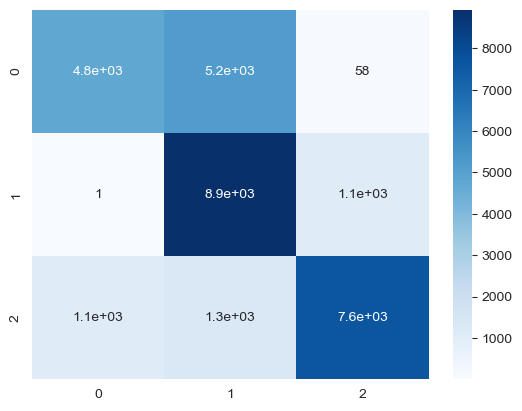

In [66]:
# Renommer les clusters attribués par K-means avec des étiquettes spécifiques
nouvelles_etiquettes = [1, 0, -1]  # Remplacez avec vos étiquettes intelligement
clusters_renommes = [nouvelles_etiquettes[cluster] for cluster in y_predict]

# Matrice de confusion`
cm = confusion_matrix(y, clusters_renommes)
sns.heatmap(cm, annot=True, cmap='Blues')

# Classification report
print(classification_report(y, clusters_renommes))

### Question 4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler



df = pd.read_csv('dataTp2.csv')

# Sélectionner les colonnes pour le clustering
columns_for_clustering = ['valence_intensity', 'fear_intensity', 'anger_intensity', 'happiness_intensity', 'sadness_intensity']

# Sélectionner les données à partir des colonnes
X = df[columns_for_clustering].values

# Normaliser les données pour mettre toutes les colonnes à la même échelle
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Utiliser la méthode de linkage pour construire la matrice de liaisons
Z = linkage(X_scaled, method='ward')

# Afficher le dendrogramme
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogramme')
plt.xlabel('Indice de l\'échantillon')
plt.ylabel('Distance euclidienne')
plt.show()

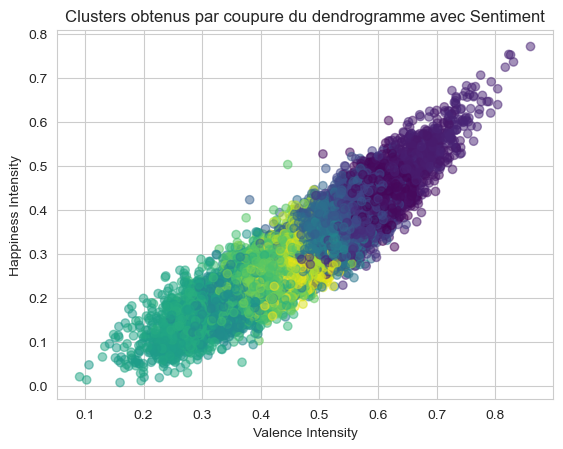

In [5]:
# Choisissez un seuil en fonction du dendrogramme
seuil = 3  # ajustez ce seuil en fonction de votre dendrogramme

# Effectuer la coupure et récupérer les clusters
clusters = fcluster(Z, t=seuil, criterion='distance')

# Ajouter les informations de cluster à votre DataFrame
df['cluster'] = clusters

# Afficher les clusters obtenus en fonction de la colonne 'sentiment'
plt.scatter(df['valence_intensity'], df['happiness_intensity'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.title('Clusters obtenus par coupure du dendrogramme avec Sentiment')
plt.xlabel('Valence Intensity')
plt.ylabel('Happiness Intensity')
plt.show()